In [5]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline
import itertools
import time
from time import sleep
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'DejaVu Sans'
import seaborn as sns
# To be able to save images on server
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
with open("UCI HAR Dataset/features.txt") as f:
    features=[line.split()[1] for line in f.readlines()]
print(len(features))

561


In [7]:
X_train=pd.read_csv("UCI HAR Dataset/train/X_train.txt",header=None,delim_whitespace=True)

<IPython.core.display.Javascript object>

In [8]:
X_train.columns=features

In [9]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,...,"fBodyGyro-bandsEnergy()-25,48",fBodyAccMag-mean(),fBodyAccMag-std(),fBodyAccMag-mad(),fBodyAccMag-max(),fBodyAccMag-min(),fBodyAccMag-sma(),fBodyAccMag-energy(),fBodyAccMag-iqr(),fBodyAccMag-entropy(),fBodyAccMag-maxInds,fBodyAccMag-meanFreq(),fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.375426,0.899469,-0.970905,-0.975510,-0.984325,...,-0.999959,-0.952155,-0.956134,-0.948870,-0.974321,-0.925722,-0.952155,-0.998285,-0.973273,-0.646376,-0.793103,-0.088436,-0.436471,-0.796840,-0.993726,-0.993755,-0.991976,-0.993365,-0.988175,-0.993726,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.27841

### Train data

In [11]:
X_train['subject']=pd.read_csv("UCI HAR Dataset/train/subject_train.txt",header=None,squeeze=True)

<IPython.core.display.Javascript object>

In [12]:
X_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)

In [14]:
y_train=pd.read_csv("UCI HAR Dataset/train/y_train.txt",names=['Activity'],squeeze=True)
y_train_labels=y_train.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})
train=X_train
train['Activity']=y_train
train['ActivityName']=y_train_labels
train.head()

<IPython.core.display.Javascript object>

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,...,fBodyAccMag-mad(),fBodyAccMag-max(),fBodyAccMag-min(),fBodyAccMag-sma(),fBodyAccMag-energy(),fBodyAccMag-iqr(),fBodyAccMag-entropy(),fBodyAccMag-maxInds,fBodyAccMag-meanFreq(),fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.375426,0.899469,-0.970905,-0.975510,-0.984325,...,-0.948870,-0.974321,-0.925722,-0.952155,-0.998285,-0.973273,-0.646376,-0.793103,-0.088436,-0.436471,-0.796840,-0.993726,-0.993755,-0.991976,-0.993365,-0.988175,-0.993726,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.9

In [21]:
print("Size of train data: ",format(train.shape))

Size of train data:  (7352, 564)


### Test data

In [16]:
X_test=pd.read_csv("UCI HAR Dataset/test/X_test.txt",header=None,delim_whitespace=True)
X_test['subject']=pd.read_csv("UCI HAR Dataset/test/subject_test.txt",header=None,squeeze=True)
y_test=pd.read_csv("UCI HAR Dataset/test/y_test.txt",names=['Activity'],squeeze=True)
y_test_labels=y_train.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})
test=X_test
test['Activity']=y_test
test['ActivityName']=y_test_labels
test.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,0.936489,-0.282719,0.115288,-0.925427,-0.937014,-0.564288,-0.930020,-0.937822,-0.605588,0.906083,-0.279244,0.152895,0.944461,-0.262160,-0.076162,-0.017827,0.829297,-0.864621,-0.967795,-0.949727,...,-0.726707,-0.777697,-0.944881,-0.790946,-0.953984,-0.873543,-0.174593,-1.000000,-0.483453,0.011041,-0.384517,-0.895061,-0.896360,-0.888197,-0.928466,-0.898100,-0.895061,-0.993471,-0.921477,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,0.927404,-0.289215,0.152568,-0.989057,-0.983887,-0.964781,-0.989000,-0.983159,-0.965206,0.856176,-0.304870,0.152895,0.944461,-0.262160,0.149013,0.057676,0.805575,-0.858163,-0.957240,-0.988403,...,-0.960680,-0.968667,-0.956861,-0.954127,-0.998476,-0.983011,-0.752056,-0.862069,0.203465,-0.206588,-0.599427,-0.945437,-0.934152,-0.929315,-0.949973,-0.967705,-0.945437,-0.997610,-0.957178,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,0.929915,-0.287513,0.146086,-0.995937,-0.988251,-0.981580,-0.995976,-0.988629,-0.980255,0.856269,-0.304870,0.139454,0.948704,-0.261661,0.144969,0.040561,0.812044,-0.859947,-0.960965,-0.995967,...,-0.977176,-0.991908,-0.992782,-0.975650,-0.999570,-0.977158,-0.816674,-1.000000,0.342456,-0.777358,-0.945478,-0.971069,-0.970308,-0.968550,-0.975455,-0.976358,-0.971069,-0.999269,-0.978222,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0.897436,-0.168805,-0.662317,-0.925364,-0.985689,-0.983273,-0.983422,-0.986857,-0.989609,-0.985689,-0.999831,-0.986148,-0.809976,-0.936508,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.97

In [19]:
print("Size of test data: ",format(test.shape))

Size of test data:  (2947, 564)


In [22]:
print('Number of duplicates in train: {}'.format(sum(train.duplicated())))
print('Number of dupliacates in test: {}'.format(sum(test.duplicated())))

Number of duplicates in train: 0
Number of dupliacates in test: 0


In [23]:
print('Number of NaN/null values in train: {}'.format(train.isnull().values.sum()))
print('Number of NaN/null values in test: {}'.format(test.isnull().values.sum()))

Number of NaN/null values in train: 0
Number of NaN/null values in test: 0


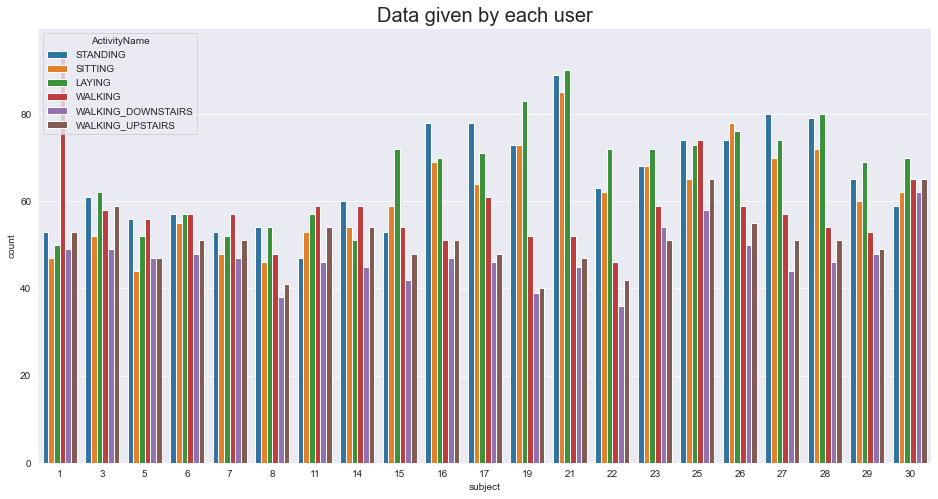

In [47]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.title('Data given by each user', fontsize e=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

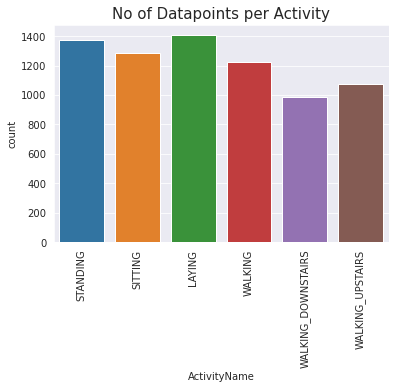

In [42]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train['ActivityName'])
plt.xticks(rotation=90)
plt.show()

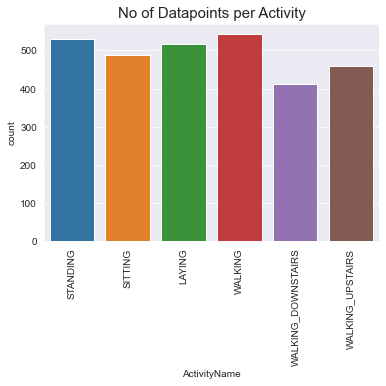

In [51]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(test['ActivityName'])
plt.xticks(rotation=90)
plt.show()

In [43]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [46]:
columns = train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [48]:
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [49]:
test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [84]:
train.to_csv('UCI HAR Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI HAR Dataset/csv_files/test.csv', index=False)

In [2]:
train=pd.read_csv("UCI HAR Dataset/csv_files/train.csv")
test=pd.read_csv("UCI HAR Dataset/csv_files/test.csv")

In [ ]:
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.4, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False)

plt.axis('equal')
plt.show()

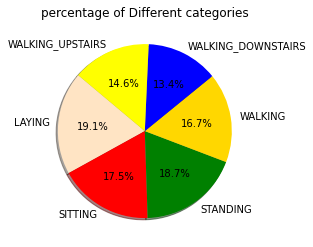

In [5]:
activity = train['ActivityName'].groupby(train['ActivityName']).count().index
activity_data = train['ActivityName'].groupby(train['ActivityName']).count().values
colors=["bisque", "red", "green", "gold", "blue","yellow"]
plt.pie(activity_data, labels=activity,  colors=colors , autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("percentage of Different categories")
plt.show()

In [6]:
activity

Index(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'],
      dtype='object', name='ActivityName')

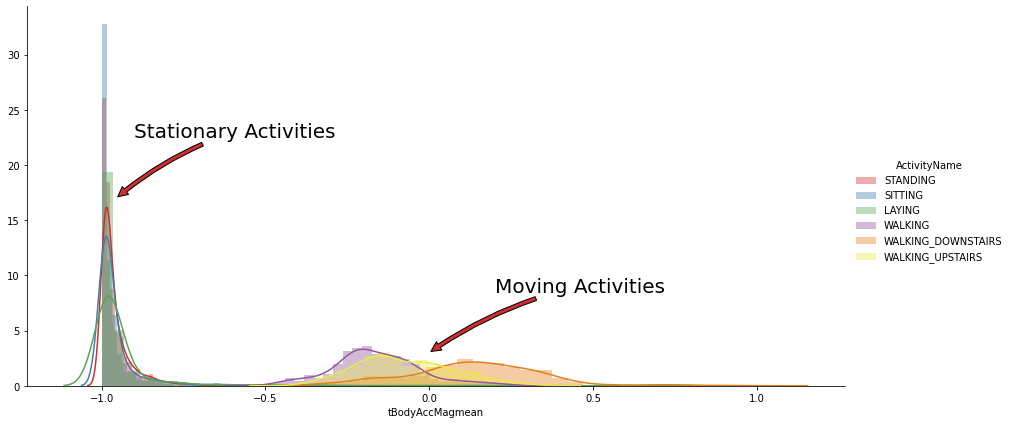

In [5]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=True)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [6]:
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

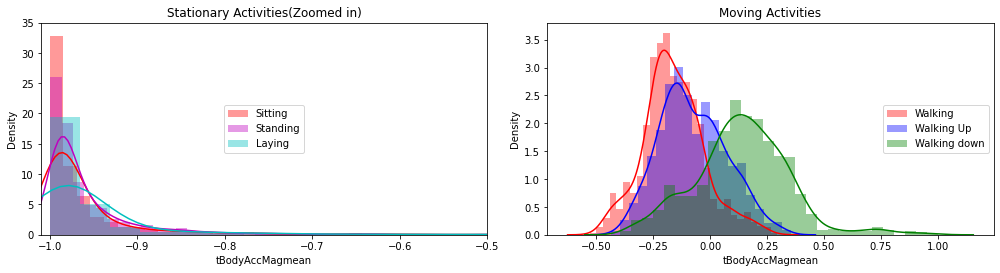

In [7]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = True, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = True,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = True, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = True, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = True,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = True, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

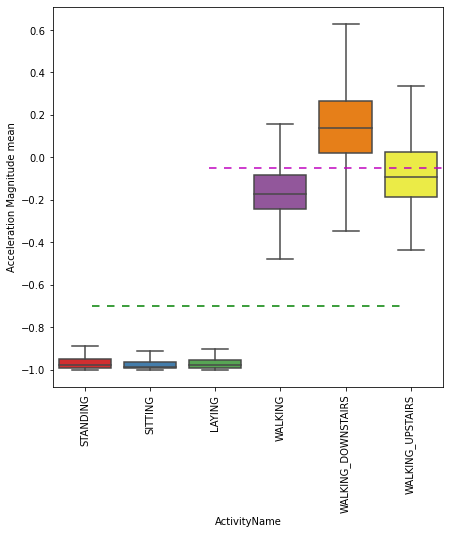

In [8]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

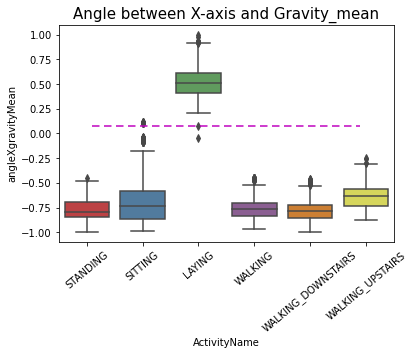

In [9]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

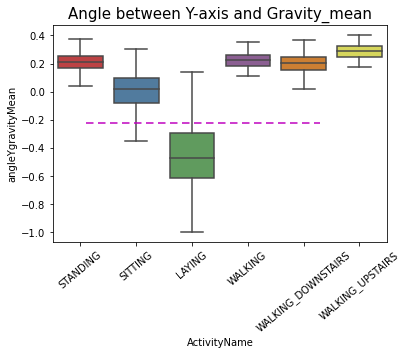

In [10]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

In [3]:
# get x_train and y_train from csv files
x_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.Activity

# get x_test and y_test from test csv file
x_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.Activity

print('x_train and y_train : ({},{})'.format(x_train.shape, y_train.shape))
print('x_test  and y_test  : ({},{})'.format(x_test.shape, y_test.shape))

x_train and y_train : ((7352, 561),(7352,))
x_test  and y_test  : ((2947, 561),(2947,))


### Logistic Regression

In [4]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
LR = linear_model.LogisticRegression()
LR = GridSearchCV(LR, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print(accuracy)
print(cm)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   19.6s finished


0.9579233118425518
[[492   1   3   0   0   0]
 [ 24 445   2   0   0   0]
 [  4  13 403   0   0   0]
 [  0   3   0 430  58   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]


In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.96      0.94      0.95       471
           3       0.99      0.96      0.97       420
           4       0.96      0.88      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



#### best estimator and best score

In [7]:
print(LR.best_estimator_)
print(LR.best_params_)
print(LR.best_score_)

LogisticRegression(C=1)
{'C': 1, 'penalty': 'l2'}
0.9381135563160393


### Linear SVM

In [8]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
svm = LinearSVC(tol=0.00005)
svm = GridSearchCV(svm, param_grid=parameters, n_jobs=-1, verbose=1)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print(accuracy)
print(cm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


0.9674244994910078
[[496   0   0   0   0   0]
 [ 17 454   0   0   0   0]
 [  3   5 412   0   0   0]
 [  0   3   0 431  55   2]
 [  1   0   0  10 521   0]
 [  0   0   0   0   0 537]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.98      0.88      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



#### best estimator and best score

In [11]:
print(svm.best_estimator_)
print(svm.best_params_)
print(svm.best_score_)

LinearSVC(C=0.5, tol=5e-05)
{'C': 0.5}
0.9422003634900594


### RBF SVM

In [12]:
parameters = {'C':[2,8,16],'gamma': [ 0.0078125, 0.125, 2]}
rSVM = SVC(kernel='rbf')
rSVM = GridSearchCV(rSVM,param_grid=parameters, n_jobs=-1)
rSVM.fit(x_train,y_train)
y_pred=rSVM.predict(x_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print(accuracy)
print(cm)

0.9626739056667798
[[489   5   2   0   0   0]
 [ 17 453   1   0   0   0]
 [  4  19 397   0   0   0]
 [  0   2   0 441  48   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.95      0.96      0.95       471
           3       0.99      0.95      0.97       420
           4       0.97      0.90      0.93       491
           5       0.92      0.98      0.95       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [14]:
print(rSVM.best_estimator_)
print(rSVM.best_score_)
print(rSVM.best_params_) 

SVC(C=16, gamma=0.0078125)
0.9447834551903698
{'C': 16, 'gamma': 0.0078125}


### Decision tree

In [7]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid.fit(x_train,y_train)
y_pred=dt_grid.predict(x_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print(accuracy)
print(cm)

0.838479809976247
[[470  16  10   0   0   0]
 [ 86 379   6   0   0   0]
 [ 49 105 266   0   0   0]
 [  0   0   0 400  91   0]
 [  0   0   0 113 419   0]
 [  0   0   0   0   0 537]]


In [8]:
print(dt_grid.best_estimator_)
print(dt_grid.best_score_)

DecisionTreeClassifier(max_depth=5)
0.8456226270249771


### Random forest

In [9]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid.fit(x_train,y_train)
y_pred=rfc_grid.predict(x_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print(accuracy)
print(cm)

0.9097387173396675
[[485   1  10   0   0   0]
 [ 48 417   6   0   0   0]
 [ 35  45 340   0   0   0]
 [  0   0   0 427  64   0]
 [  0   0   0  57 475   0]
 [  0   0   0   0   0 537]]


In [10]:
print(rfc_grid.best_estimator_)
print(rfc_grid.best_score_)

RandomForestClassifier(max_depth=7, n_estimators=70)
0.9215223111678391


### GBDT

In [ ]:
param_grid = {'max_depth': np.arange(5,8,1),'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid.fit(x_train,y_train)
y_pred=gbdt_grid.predict(x_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print(accuracy)
print(cm)

In [ ]:
print(gbdt_grid.best_estimator_)
print(gbdt_grid.best_score_)

### Neural Network

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam

In [5]:
!pip install np_utils

In [6]:
from keras.utils import np_utils

In [7]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train['Activity']-1 , num_classes=6)
y_test = to_categorical(test['Activity']-1 , num_classes=6)

In [8]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [9]:
print(x_train.shape)

(7352, 561)


In [53]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1] , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(196, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer = Adam(lr = 0.001),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 64)                35968     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
dense_43 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 196)              

In [54]:
history=model.fit(x_train, y_train , epochs=30 , batch_size = 512 , validation_data=(x_test, y_test))

Epoch 1/30
15/15 [==============================] - 2s 35ms/step - loss: 1.5575 - accuracy: 0.3017 - val_loss: 1.4340 - val_accuracy: 0.3051
Epoch 2/30
15/15 [==============================] - 0s 16ms/step - loss: 1.0796 - accuracy: 0.4882 - val_loss: 1.0969 - val_accuracy: 0.7896
Epoch 3/30
15/15 [==============================] - 0s 16ms/step - loss: 0.7556 - accuracy: 0.6780 - val_loss: 0.7638 - val_accuracy: 0.8086
Epoch 4/30
15/15 [==============================] - 0s 15ms/step - loss: 0.5359 - accuracy: 0.7666 - val_loss: 0.5835 - val_accuracy: 0.8731
Epoch 5/30
15/15 [==============================] - 0s 16ms/step - loss: 0.4450 - accuracy: 0.8054 - val_loss: 0.5073 - val_accuracy: 0.8500
Epoch 6/30
15/15 [==============================] - 0s 16ms/step - loss: 0.3748 - accuracy: 0.8379 - val_loss: 0.4162 - val_accuracy: 0.9216
Epoch 7/30
15/15 [==============================] - 0s 16ms/step - loss: 0.3333 - accuracy: 0.8603 - val_loss: 0.3781 - val_accuracy: 0.9230
Epoch 8/30
15

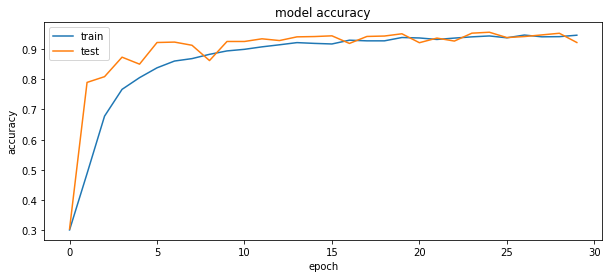

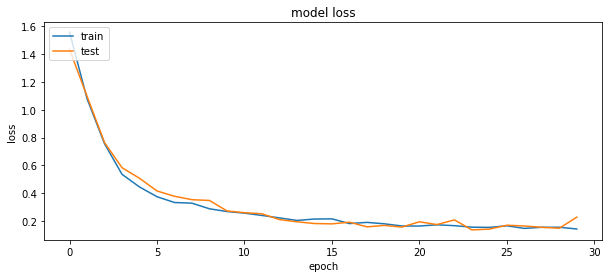

In [55]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [57]:
CM = confusion_matrix(y_true, pred)
print(CM)

[[465   1  30   0   0   0]
 [ 30 396  45   0   0   0]
 [  2   5 413   0   0   0]
 [  0   2   0 389 100   0]
 [  1   0   0  14 517   0]
 [  0   0   0   0   1 536]]


In [58]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       496
           1       0.98      0.84      0.91       471
           2       0.85      0.98      0.91       420
           3       0.97      0.79      0.87       491
           4       0.84      0.97      0.90       532
           5       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



In [22]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [ ]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [ ]:
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [ ]:
# Utility function to print the confusion matrix
def confusion_matrix_dl(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/MyDrive/DataSet CS/HumanActivityRecognition/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/drive/MyDrive/DataSet CS/HumanActivityRecognition/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
# Configuring a session
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [ ]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [ ]:
# Loading the train and test data
x_train, x_test, y_train, y_test = load_data()

In [ ]:
timesteps = len(x_train[0])
input_dim = len(x_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(x_train))

In [ ]:
input_shape=(timesteps, input_dim)

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(x_train,
          y_train,
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          epochs=epochs)

In [ ]:
# Confusion Matrix
print(confusion_matrix_dl(y_test, model.predict(x_test)))

In [ ]:
score = model.evaluate(x_test, y_test)

In [ ]:
score